# PRML Bonus Project: Bitcoin Prediction
### Kartik Choudhary [B20CS025]

Importing Libraries

In [123]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

Loading Data

In [2]:
bitcoin = pd.read_csv('/content/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv')
bitcoin = bitcoin[::-1]
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


In this notebook, the closing price is explored and predicted.

In [3]:
X = np.array(bitcoin[['Open', 'High', 'Low']])
X = preprocessing.scale(X)
y = np.array(bitcoin['Close'])

Splitting into Test/Train:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Using Decision Tree Regressor

In [5]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
print('Decision Tree Regressor: {}'.format(dtr.score(X_test, y_test)))

Decision Tree Regressor: 0.9961676594055343


In [6]:
abdtr = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 100)
abdtr.fit(X_train, y_train)
abdtr_pred = abdtr.predict(X_test)
abdtr_score = abdtr.score(X_test, y_test)
print('Ada Boost - Decision Tree Regressor: {}'.format(abdtr_score))

Ada Boost - Decision Tree Regressor: 0.9963730893903499


In [7]:
rfr = RandomForestRegressor(n_estimators = 300)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
print('Random Forest Regressor: {}'.format(rfr.score(X_test, y_test)))

Random Forest Regressor: 0.9979960259015486


In [8]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
lr_pred = linreg.predict(X_test)
linreg_score = linreg.score(X_test, y_test)
print('Linear Regression: {}'.format(linreg_score))

Linear Regression: 0.9982009246570771


In [9]:
for k in ['linear','poly','rbf','sigmoid']:
    svr = SVR(kernel=k)
    svr.fit(X_train, y_train)
    svr_score = svr.score(X_test, y_test)
    print('SVR {}: {}'.format(k, svr_score))

SVR linear: 0.9975951826589186
SVR poly: 0.7097205657146175
SVR rbf: 0.250519745742395
SVR sigmoid: 0.6188342457723466


In [10]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print('KNN Regressor: {}'.format(knn_score))

KNN Regressor: 0.9979633245677225


Bitcoin Time Series Prediction with LSTM

In [12]:
data = pd.read_csv(filepath_or_buffer=r"/content/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv", index_col="Date")


In [13]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [14]:
p = data["Close"]
temp = data.drop(['Close'], axis=1)
temp

,Open,High,Low,Volume,Market Cap
Date,,,,,
"Jul 31, 2017",2763.24,2889.62,2720.61,"860,575,000","45,535,800,000"
"Jul 30, 2017",2724.39,2758.53,2644.85,"705,943,000","44,890,700,000"
"Jul 29, 2017",2807.02,2808.76,2692.80,"803,746,000","46,246,700,000"
"Jul 28, 2017",2679.73,2897.45,2679.73,"1,380,100,000","44,144,400,000"
"Jul 27, 2017",2538.71,2693.32,2529.34,"789,104,000","41,816,500,000"
...,...,...,...,...,...
"May 02, 2013",116.38,125.60,92.28,-,"1,292,190,000"
"May 01, 2013",139.00,139.89,107.72,-,"1,542,820,000"
"Apr 30, 2013",144.00,146.93,134.05,-,"1,597,780,000"


In [15]:
p = pd.DataFrame(p)


In [16]:
temp = pd.concat([temp, p], axis=1)

In [17]:
temp

,Open,High,Low,Volume,Market Cap,Close
Date,,,,,,
"Jul 31, 2017",2763.24,2889.62,2720.61,"860,575,000","45,535,800,000",2875.34
"Jul 30, 2017",2724.39,2758.53,2644.85,"705,943,000","44,890,700,000",2757.18
"Jul 29, 2017",2807.02,2808.76,2692.80,"803,746,000","46,246,700,000",2726.45
"Jul 28, 2017",2679.73,2897.45,2679.73,"1,380,100,000","44,144,400,000",2809.01
"Jul 27, 2017",2538.71,2693.32,2529.34,"789,104,000","41,816,500,000",2671.78
...,...,...,...,...,...,...
"May 02, 2013",116.38,125.60,92.28,-,"1,292,190,000",105.21
"May 01, 2013",139.00,139.89,107.72,-,"1,542,820,000",116.99
"Apr 30, 2013",144.00,146.93,134.05,-,"1,597,780,000",139.00


In [18]:
for i in range(1556):
    if(temp['Volume'][i] == '-'):
        temp['Volume'][i] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
for i in range(1556):
    if(temp['Market Cap'][i] != '-'):
        temp['Market Cap'][i] = temp['Market Cap'][i].replace(',', '')
        temp['Market Cap'][i] = float(temp['Market Cap'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
temp.fillna(temp.mean().round(1), inplace=True)


In [31]:
data = temp

In [32]:
data

,Open,High,Low,Volume,Market Cap,Close
Date,,,,,,
"Jul 31, 2017",2763.24,2889.62,2720.61,8.605750e+08,4.553580e+10,2875.34
"Jul 30, 2017",2724.39,2758.53,2644.85,7.059430e+08,4.489070e+10,2757.18
"Jul 29, 2017",2807.02,2808.76,2692.80,8.037460e+08,4.624670e+10,2726.45
"Jul 28, 2017",2679.73,2897.45,2679.73,1.380100e+09,4.414440e+10,2809.01
"Jul 27, 2017",2538.71,2693.32,2529.34,7.891040e+08,4.181650e+10,2671.78
...,...,...,...,...,...,...
"May 02, 2013",116.38,125.60,92.28,1.481643e+08,1.292190e+09,105.21
"May 01, 2013",139.00,139.89,107.72,1.481643e+08,1.542820e+09,116.99
"Apr 30, 2013",144.00,146.93,134.05,1.481643e+08,1.597780e+09,139.00


Plot line graph base on 'Close'

In [33]:
btc_trace = go.Scatter(x=data.index, y=data['Close'], name= 'Price')
py.iplot([btc_trace])

Fill value 0 data points on Weighted Price with NAN and then use ffill method to fill values¶


In [34]:
data['Close'].replace(0, np.nan, inplace=True)
data['Close'].fillna(method='ffill', inplace=True)

Plot new line graph again on Close with newly filled values

In [36]:
btc_trace = go.Scatter(x=data.index, y=data['Close'], name= 'Price')
py.iplot([btc_trace])

Use MinMaxScaler to normalize Close to range from 0 to 1

In [37]:
from sklearn.preprocessing import MinMaxScaler
values = data['Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

Split 70% of data for training and 30% for testing

In [38]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1089 467


Create function for creating dataset with look back

In [39]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

Generate dataset for trainX, trainY, testX, testY¶

In [40]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1088
466


Reshape X for model training

In [41]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [43]:
#Running the LSTM model with 300 epochs
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

Plotting line graph to show amount loss according the the epoch

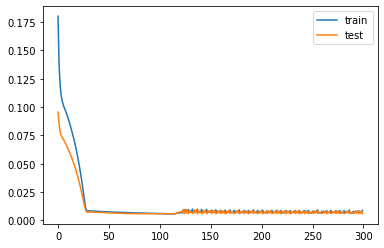

In [44]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Make prediction using textX and plotting line graph against testY

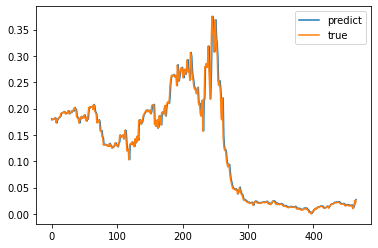

In [45]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

Scaler Inverse Y back to normal value

In [46]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

RMSE

In [47]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 34.409


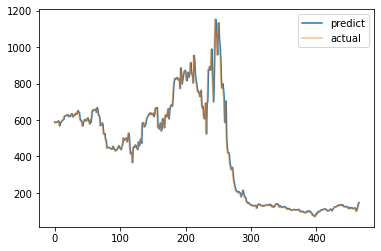

In [48]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

Convert X to dates

In [49]:
predictDates = data.tail(len(testX)).index


Reshape testY and yhat for plotly

In [50]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

Plot predicted and actual line graph

In [51]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])

Using additional features for model training

In [55]:
#Find corrleration in features to Close

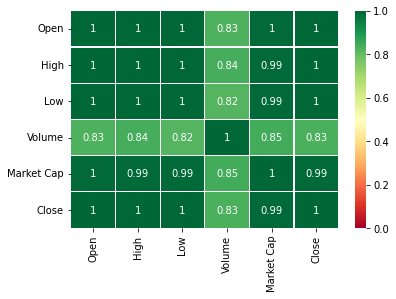

In [54]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)


Observation: Volume is corrlerated to Close. Open, High, Low,  are directly related to Close

Function to convert series to supervised learning

In [56]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

Get all data values

In [57]:
values = data[['Close'] + ['Volume'] + ['Market Cap']].values
values = values.astype('float32')

Normalize features to range from 0 to 1

In [58]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

Frame as supervised learning

In [59]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
1,0.971357,0.334175,0.940028,0.930466,0.273929,0.926479
2,0.930466,0.273929,0.926479,0.919832,0.312034,0.954959
3,0.919832,0.312034,0.954959,0.948403,0.536587,0.910804
4,0.948403,0.536587,0.910804,0.900913,0.306329,0.861911
5,0.900913,0.306329,0.861911,0.851658,0.364108,0.875321


In [60]:
#Drop unncessary columns

In [61]:
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.971357   0.334175   0.940028  0.930466
2   0.930466   0.273929   0.926479  0.919832
3   0.919832   0.312034   0.954959  0.948403
4   0.948403   0.536587   0.910804  0.900913
5   0.900913   0.306329   0.861911  0.851658


Split data to 70% training, 30% testing

In [62]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1088, 1, 3) (1088,) (467, 1, 3) (467,)


Training the LSTM model with 300 epochs

In [63]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

Plot line graph to show amount loss according the the epoch

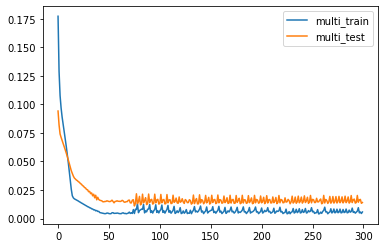

In [64]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

Make prediction using textX and plotting line graph against testY

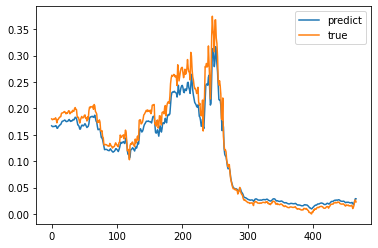

In [65]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

Scaler Inverse Y back to normal value

In [66]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

RMSE

In [67]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 52.949


Plot line graph with actual price, predicted price with feature Close, predicted price with features Volume and Close Price

In [68]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, multi_predict_chart, actual_chart])

* LSTM with single feature of Weighted Price have RMSE of 34.409

* LSTM with features of Volume and Close Price have RMSE of 52.949




Using Simple RNN Model

In [81]:
data = pd.read_csv(r"/content/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


30% test data and 70 % training data

In [88]:
test = data.iloc[:467, :]
test

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
462,"Apr 25, 2016",459.12,466.62,453.59,461.43,"87,091,800","7,102,490,000"
463,"Apr 24, 2016",450.56,460.15,448.93,458.56,"68,198,400","6,968,570,000"
464,"Apr 23, 2016",445.86,450.28,444.33,450.28,"50,485,400","6,894,280,000"
465,"Apr 22, 2016",449.69,449.81,444.15,445.74,"58,804,400","6,951,860,000"


In [89]:
train = data.iloc[467:, :]
train

,Date,Open,High,Low,Close,Volume,Market Cap
467,"Apr 20, 2016",435.32,443.05,434.41,441.39,"72,890,100","6,726,370,000"
468,"Apr 19, 2016",428.70,436.02,428.10,435.51,"52,810,500","6,622,450,000"
469,"Apr 18, 2016",427.61,429.27,427.09,428.59,"55,670,900","6,604,150,000"
470,"Apr 17, 2016",430.64,431.37,426.08,427.40,"52,125,900","6,649,170,000"
471,"Apr 16, 2016",429.57,432.63,428.98,430.57,"39,392,800","6,631,310,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [90]:
train = train[::-1]
test = test[::-1]

In [92]:
print(train.shape)
print(test.shape)

(1089, 7)
(467, 7)


In [93]:
train.head()


,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [94]:
train.tail()


,Date,Open,High,Low,Close,Volume,Market Cap
471,"Apr 16, 2016",429.57,432.63,428.98,430.57,"39,392,800","6,631,310,000"
470,"Apr 17, 2016",430.64,431.37,426.08,427.40,"52,125,900","6,649,170,000"
469,"Apr 18, 2016",427.61,429.27,427.09,428.59,"55,670,900","6,604,150,000"
468,"Apr 19, 2016",428.70,436.02,428.10,435.51,"52,810,500","6,622,450,000"
467,"Apr 20, 2016",435.32,443.05,434.41,441.39,"72,890,100","6,726,370,000"


In [95]:
test


,Date,Open,High,Low,Close,Volume,Market Cap
466,"Apr 21, 2016",441.42,450.55,440.95,449.43,"68,204,700","6,822,320,000"
465,"Apr 22, 2016",449.69,449.81,444.15,445.74,"58,804,400","6,951,860,000"
464,"Apr 23, 2016",445.86,450.28,444.33,450.28,"50,485,400","6,894,280,000"
463,"Apr 24, 2016",450.56,460.15,448.93,458.56,"68,198,400","6,968,570,000"
462,"Apr 25, 2016",459.12,466.62,453.59,461.43,"87,091,800","7,102,490,000"
...,...,...,...,...,...,...,...
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


Reverse the order of the date so that it becomes chronological order

In [96]:
train = train[::-1] 
test = test[::-1]
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
467,"Apr 20, 2016",435.32,443.05,434.41,441.39,"72,890,100","6,726,370,000"
468,"Apr 19, 2016",428.70,436.02,428.10,435.51,"52,810,500","6,622,450,000"
469,"Apr 18, 2016",427.61,429.27,427.09,428.59,"55,670,900","6,604,150,000"
470,"Apr 17, 2016",430.64,431.37,426.08,427.40,"52,125,900","6,649,170,000"
471,"Apr 16, 2016",429.57,432.63,428.98,430.57,"39,392,800","6,631,310,000"


Change the date notation(string date) to numerical date

In [97]:
from dateutil.parser import parse
from datetime import datetime

def convert(date):
    holder = []
    for i in date:
        tp = parse(i).timestamp()
        dt = datetime.fromtimestamp(tp)
        holder.append(dt)
    return np.array(holder)

In [98]:
date = train['Date'].values
date_n = convert(date)

In [99]:
# sanity check
print(len(date_n) == train.shape[0])

True


In [100]:
train['Date'] = date_n
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
467,2016-04-20,435.32,443.05,434.41,441.39,"72,890,100","6,726,370,000"
468,2016-04-19,428.70,436.02,428.10,435.51,"52,810,500","6,622,450,000"
469,2016-04-18,427.61,429.27,427.09,428.59,"55,670,900","6,604,150,000"
470,2016-04-17,430.64,431.37,426.08,427.40,"52,125,900","6,649,170,000"
471,2016-04-16,429.57,432.63,428.98,430.57,"39,392,800","6,631,310,000"


Set Index as Date

In [101]:
train = train.set_index('Date')
train.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-04-20,435.32,443.05,434.41,441.39,"72,890,100","6,726,370,000"
2016-04-19,428.70,436.02,428.10,435.51,"52,810,500","6,622,450,000"
2016-04-18,427.61,429.27,427.09,428.59,"55,670,900","6,604,150,000"
2016-04-17,430.64,431.37,426.08,427.40,"52,125,900","6,649,170,000"
2016-04-16,429.57,432.63,428.98,430.57,"39,392,800","6,631,310,000"


In [102]:
train.describe()


,Open,High,Low,Close
count,1089.000000,1089.000000,1089.000000,1089.000000
mean,368.556657,378.245152,358.019082,368.795519
std,200.802458,208.287165,191.311594,200.642994
min,68.500000,74.560000,65.530000,68.430000
25%,232.770000,236.450000,229.230000,232.880000
50%,339.820000,351.810000,329.970000,339.490000
75%,457.540000,466.320000,446.010000,458.600000
max,1152.730000,1156.140000,1106.610000,1151.170000


In [103]:
# check the missing values
train.isnull().any()


Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

In [104]:
close = train['Close']


Lag Plot ( check whether time series is random or not)

In the graph below, firt axis represents the t(lag), seond axis represents t+1

Ex: if data is, [1,4,5,3,2], then y(t):= [1,4,5,3,2], y(t+1): = [4,5,3,2]

As we see the graph below, this suggests the non-random pattern (graph is poistively linear).

Non-randomness in the data reveals that we could use an autoregressive model

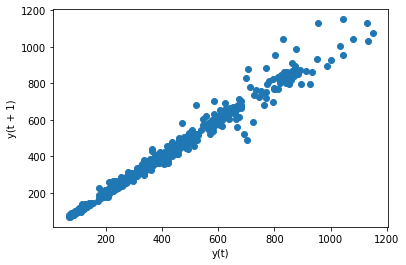

In [105]:
from pandas.plotting import lag_plot
lag_plot(close)

Autocorrelation

A lag plot above shows the structure in the data. In order to quantify the correlation between the point at t and point at t+1 withe respect to expectation, autocrrelation is used.

A black line in the graph below shows the expectation for random data(thus 0 correlation) and two dash lines above and below it represent the confidence interval with each 95% and 99%.

The graph shows a strong correlation for lags of < 100 days. (lag 0 is always 1 corrleation)

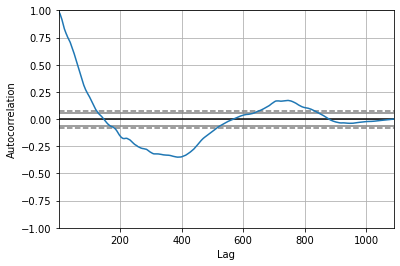

In [106]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(close)

Autoregression

lag plot and autocorrelation revealed that we could use autoregression for fitting data we will predict test data (closing price for 7 days) using training data

In [107]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

test = test['Close'].values

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [108]:
train_pr = train['Close'].values


In [109]:
# train and fit autoregression
model = AR(train_pr)
model_fit = model.fit()

print("Lag: %s" % model_fit.k_ar)
print("Coefficients: %s" % model_fit.params)

pred = model_fit.predict(start=len(train), end=len(train_pr)+len(test)-1, dynamic=False)
mse = mean_squared_error(test, pred)
print("Test MSE {0:.3f}".format(mse))

Lag: 22
Coefficients: [ 1.83472357  0.96720046 -0.0569276  -0.00828725  0.17384881  0.04343719
 -0.05051123 -0.04929054 -0.05194181  0.0408555   0.02069742  0.09656148
 -0.09807394  0.01722112  0.00650115 -0.08464614 -0.00417911  0.10994566
 -0.24109722 -0.02627069  0.2208667  -0.12538285  0.09378834]
Test MSE 1208909.920


Important to note:

22 lags are used to train the model (22 previous points are used to predict a next point)

MSE is high

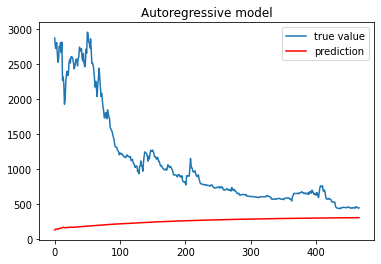

In [110]:
plt.plot(test, label='true value')
plt.plot(pred, color='red', label='prediction')
plt.title("Autoregressive model")
plt.legend()

In [114]:
test = data.iloc[:467, :]
train = data.iloc[467:, :]
train = train[::-1]
test = test[::-1]


In [115]:
train = train['Close'].values.astype('float32')
test = test['Close'].values.astype('float32')

In [116]:
train

array([134.21, 144.54, 139.  , ..., 428.59, 435.51, 441.39], dtype=float32)

standardizing the data before feeding it to neural network

In [117]:
# reshape data to scale the point
train = train.reshape(-1, 1)
test = test.reshape(-1, 1)

scaler = StandardScaler()
train_n = scaler.fit_transform(train)
test_n = scaler.transform(test)

In [118]:
print(train_n.shape)
print(test_n.shape)

(1089, 1)
(467, 1)


In [119]:
def generator(data, lookback, delay, min_index, max_index, 
              shuffle=False, batch_size=128, step=1):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
                
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay]
        yield samples, targets

Hyperparameters:

lookback: how many points (days) shoud be used as inputs to predict the future value

delay: how many points should be predicted

Ex: In this example, we use previous prices for 22 days as input to predict the prices for future 7 days

The reason why I chose thses values are:

lookback: 22 is the value chosen by autoregressive model 

delay: test data has 7 points(daily values) so prediction and true values wiill be possible

In [137]:
lookback = 22
step = 1
delay = 7
batch_size = 128
train_gen = generator(train_n, lookback=lookback, delay=delay,
    min_index=0, max_index=1000, shuffle=True, step=step,
batch_size=batch_size)
val_gen = generator(train_n, lookback=lookback, delay=delay,
    min_index=1001, max_index=None, step=step, batch_size=batch_size)
test_gen = generator(test_n, lookback=lookback, delay=delay,
    min_index=0, max_index=None, step=step, batch_size=batch_size)
val_steps = (len(train_n) - 1001 - lookback) // batch_size
test_steps = (len(test_n) - lookback) // batch_size

In [138]:
# reproducibility (make sure each time training is occurred, the result will be the same)
np.random.seed(7)

In [139]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, train_n.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 32)                3360      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [125]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



500/500 [==============================] - 18s 28ms/step - loss: 0.2554
Epoch 2/40
500/500 [==============================] - 12s 23ms/step - loss: 0.2304
Epoch 3/40
500/500 [==============================] - 12s 24ms/step - loss: 0.2173
Epoch 4/40
500/500 [==============================] - 12s 23ms/step - loss: 0.2102
Epoch 5/40
500/500 [==============================] - 12s 23ms/step - loss: 0.2024
Epoch 6/40
500/500 [==============================] - 12s 23ms/step - loss: 0.1968
Epoch 7/40
500/500 [==============================] - 12s 23ms/step - loss: 0.1937
Epoch 8/40
500/500 [==============================] - 12s 25ms/step - loss: 0.1840
Epoch 9/40
500/500 [==============================] - 12s 23ms/step - loss: 0.1782
Epoch 10/40
500/500 [==============================] - 12s 23ms/step - loss: 0.1747
Epoch 11/40
500/500 [==============================] - 12s 23ms/step - loss: 0.1698
Epoch 12/40
500/500 [==============================] - 12s 23ms/step - loss: 0.1668
Epoch 13/40


In [136]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'blue', label='train loss')
plt.plot(epochs, val_loss, 'orange', label='test loss')
plt.title('Training and validation loss')
plt.legend()

KeyError: ignored

Important to note: Overfitting. Further hyperparamter tuing is necessary (strong drop-out, regularization)



In [140]:
train_re = train_n.reshape(-1,1,1)
pred = model.predict(train_re)

Since we scaled the data, it is necessary to scale back to data in original units to plot the data



In [141]:
pred = scaler.inverse_transform(pred)


Text(0.5, 1.0, 'Prediction on training data')

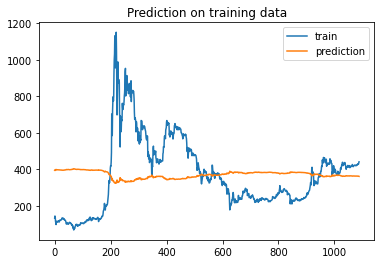

In [142]:
plt.plot(range(len(train_re)), train, label='train')
plt.plot(range(len(train_re)), pred, label='prediction')
plt.legend()
plt.title("Prediction on training data")